<a href="https://colab.research.google.com/github/toba717/financial_engineering_projects/blob/main/black_scholes_formula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Black Scholes Model

## Takao Oba

### Assisted by Jonathan from Quantpy

##### I aim to price European-stype options.

##### The Black-Scholes formula is a mathematical model used to price European-style options. It is a widely used tool in finance and is named after Fischer Black and Myron Scholes, who developed it in 1973. European-style options can only be exercised at the expiration date of the option, while American-style options can be exercised at any time before the expiration date.

##### The Black-Scholes formula takes into account five main factors: the stock price, the option's strike price, the time until the option's expiration date, the risk-free interest rate, and the option's implied volatility. The formula allows the option's price to be calculated based on these factors and the option's type (call or put). A call option gives the holder the right to buy the underlying stock at a predetermined price (the strike price), while a put option gives the holder the right to sell the underlying stock at a predetermined price.

##### The Black-Scholes formula is commonly used to value options on stocks, but it can also be used to value options on other assets such as currencies, commodities, and bonds. It is important to note that the Black-Scholes formula makes several assumptions, including that the stock price follows a lognormal distribution, that the risk-free interest rate is constant, and that there are no dividends paid out on the stock. These assumptions may not always hold true in practice, so the Black-Scholes formula may not always accurately price options.

Image by https://tradeoptionswithme.com/black-scholes-explained/
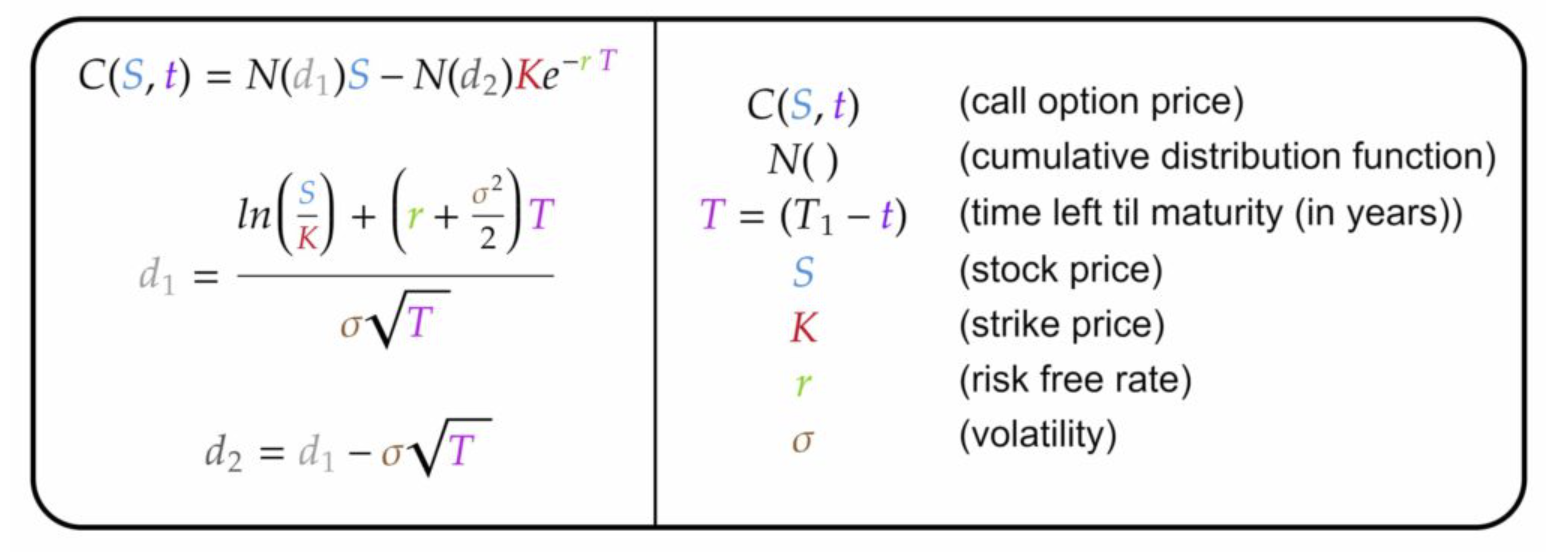

In [1]:
# importing necessary packages
import numpy as np
#!pip install scipy
from scipy.stats import norm


In [2]:
# recall the input variables that will be utilized for the formula
interest_rate = 0.01 #r
underlying = 30 #S
strike_price = 40 #K
time = 240/365 #T
volatility = 0.3 #sigma

In [4]:
# Generate a function
# We want to consider both calls and puts, default parameter is call
def blackScholes(interest_rate, underlying, strike_price, time, volatility, type = "C"):
  #Calculate BS option price for a call/put

  d1 = (np.log(underlying/strike_price) + (interest_rate + volatility**2/2)*time)/(volatility*np.sqrt(time))
  d2 = d1 - volatility*np.sqrt(time)

  try:
    if type == "C":
      # consider call
      price = underlying*norm.cdf(d1,0,1) - strike_price*np.exp(-interest_rate*time)*norm.cdf(d2,0,1)
    elif type == "P":
      # consider put
      price = strike_price*np.exp(-interest_rate*time)*norm.cdf(-d2, 0, 1) - underlying*norm.cdf(-d1,0,1)
    return price
  except:
    print("Please re-confirm all option parameters above.")

In [5]:
print("Option Price is: ", round(blackScholes(interest_rate, underlying, strike_price, time, volatility, type = "C"),2))

Option Price is:  0.51


In [7]:
print("Option Price is: ", round(blackScholes(interest_rate, underlying, strike_price, time, volatility, type = "P"),2))

Option Price is:  10.25


In [10]:
# Redefining the function to print the values as well
def blackScholes(interest_rate, underlying, strike_price, time, volatility, type = "C"):
  #Calculate BS option price for a call/put

  d1 = (np.log(underlying/strike_price) + (interest_rate + volatility**2/2)*time)/(volatility*np.sqrt(time))
  d2 = d1 - volatility*np.sqrt(time)

  try:
    if type == "C":
      # consider call
      price = underlying*norm.cdf(d1,0,1) - strike_price*np.exp(-interest_rate*time)*norm.cdf(d2,0,1)
    elif type == "P":
      # consider put
      price = strike_price*np.exp(-interest_rate*time)*norm.cdf(-d2, 0, 1) - underlying*norm.cdf(-d1,0,1)
    print("Option Price is: ", round(price,2))
  except:
    print("Please re-confirm all option parameters above.")

In [13]:
blackScholes(interest_rate, underlying, strike_price, time, volatility, type = "P")

Option Price is:  10.25


In [14]:
# Notice how the value above is the same as what we have previously calculated.

## Try with actual examples

#### Apple Inc. (AAPL)

From https://finance.yahoo.com/quote/AAPL/options?straddle=true&date=1672963200:

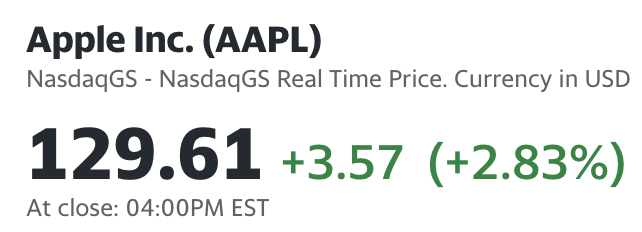

In [15]:
blackScholes(0.02, 129.61, 120, 8/365, volatility, type = "C")

Option Price is:  9.75


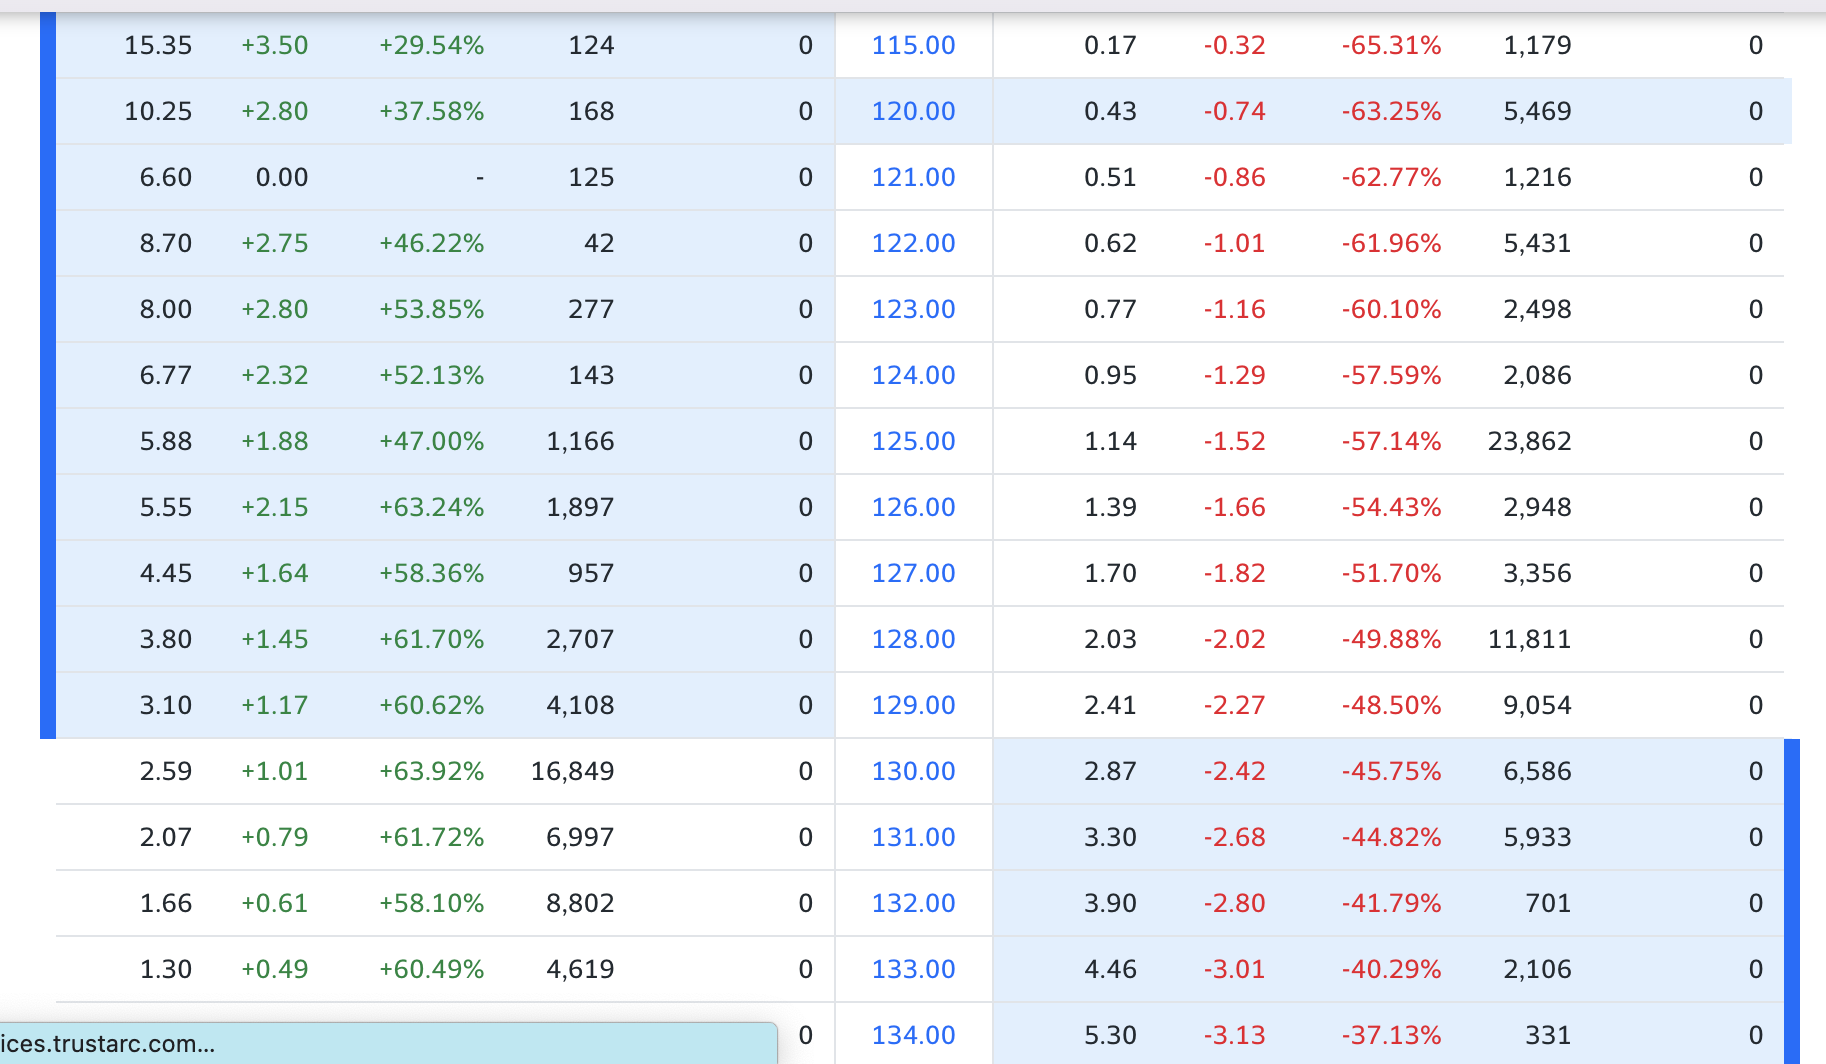

##### We can see that the estimated option price is fairly close to our actual option price

According to https://www.gurufocus.com/term/volatility/AAPL/Volatility/:

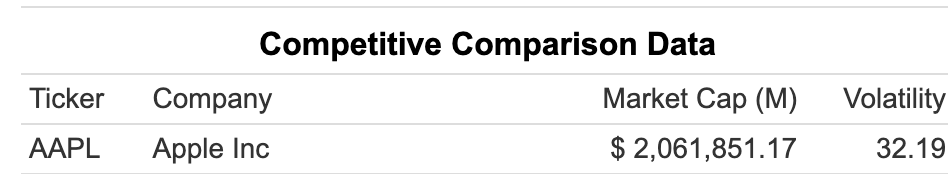

In [ ]:
# Recalculate the option value with the implied volatility of 0.3219

In [29]:
# Experiment with various rates

blackScholes(0.03, 129.61, 120, 8/365, 0.3219, type = "C")

Option Price is:  9.82


#### We can see that the option price became closer to the actual value

#### However, recall the assumption of Black-Scholes Formula: The options must be European style options meaning that they can only be exercisable at expiration. The AAPL options can be exercised at any times, which means that this assumption is violated.
#### Further, the stocks do not pay dividends. The stock price is adjusted downward by the dividend amount when the dividend is paid. AAPL is a stock that has an approximate 0.7% of dividend yield as of 2022. Thus, this assumption is also violated. The share paying dividends affects the stock price as well as the option prices.


## **In conclusion, the Black-Scholes Formula does not generate a completely accurate result for the option price. This is because multiple assumptions are not met. However, the Black-SCholes Formula does generate an overall framework for the option price through looking at the time, stock price or underlying price, strike price, risk free rate, and the (implied) volatility.**